https://machine-learning-python.kspax.io/ex3_plotting_validation_curves/ex3_plotting_validation_curves
https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits #0~9的手寫數字，共1797筆
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## 建立模型

In [3]:
X, y = load_digits(return_X_y= True)
param_range = np.logspace(-6,-1,5)#要改變的因子：參數gamma的值域，由10的-6次方到10的-1次方之間取5個值作為不同的gamma
train_scores, test_scores = validation_curve(SVC(),X,y,param_name="gamma",param_range=param_range,scoring="accuracy",n_jobs=1)

In [7]:
train_scores_mean = np.mean(train_scores,axis=1)
train_scores_std = np.std(train_scores,axis=1)

test_scores_mean = np.mean(test_scores,axis=1)
test_scores_std = np.std(test_scores,axis=1)

## 作圖 validation curve

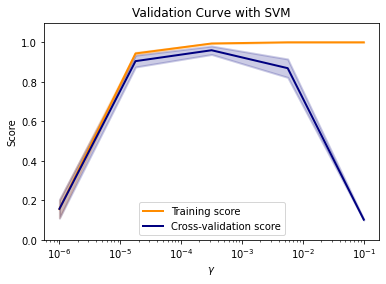

In [24]:
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")

plt.ylim(0.0, 1.1) #y軸範圍
lw = 2 #線寬

plt.semilogx(param_range, train_scores_mean, label="Training score",color="darkorange", lw=lw)# 將X軸改為對數比例
plt.fill_between(param_range, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.2,color="darkorange", lw=lw)#將train/test scores的平均值與標準差之間的差距用顏色填滿

plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.2,color="navy", lw=lw)

plt.legend(loc="best")# 顯示每個數據相對應的圖例名稱，其中loc="best"為顯示圖例名稱的位置，best表示自動分配最佳位置
plt.show()